<a href="https://colab.research.google.com/github/Amin-Lotfian/Python-project-excercises-and-projects/blob/main/11_exercise_pandas_Pivot_Tables_min_median_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
!pip install datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df.pivot_table(index='job_title_short', values='salary_year_avg', aggfunc='median')
df.groupby('job_title_short')['salary_year_avg'].median()


,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


in pivot table when you want to count the size,

the 'values' will be disabled and we will add 'aggfunc=size or count'

In [ ]:
df.pivot_table(index='job_title_short', aggfunc='size')
df.groupby('job_title_short').size()

,0
job_title_short,
Business Analyst,49063
Cloud Engineer,12331
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Machine Learning Engineer,14080
Senior Data Analyst,29216
Senior Data Engineer,44563
Senior Data Scientist,36957


In [ ]:
df.pivot_table(index='job_title_short', aggfunc='count')
df.groupby('job_title_short').count()

,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_title_short,,,,,,,,,,,,,,,,
Business Analyst,49063,48991,49063,47812,49063,49063,49063,49063,49063,49057,1024,610,388,49063,36755,36755
Cloud Engineer,12331,12322,12331,12180,12331,12331,12331,12331,12331,12329,91,65,21,12331,8969,8969
Data Analyst,196075,195801,196067,191475,196075,196075,196075,196075,196075,196067,9746,5451,4138,196070,159394,159394
Data Engineer,186240,186005,186241,183591,186241,186241,186241,186241,186241,186237,6847,4500,2277,186236,169362,169362
Data Scientist,172286,172072,172286,170158,172286,172286,172286,172286,172286,172281,8589,5922,2581,172281,145807,145807
Machine Learning Engineer,14080,14061,14080,13890,14080,14080,14080,14080,14080,14078,637,576,46,14080,12171,12171
Senior Data Analyst,29216,29169,29216,28708,29216,29216,29216,29216,29216,29214,1492,1131,353,29216,24870,24870
Senior Data Engineer,44563,44483,44563,44098,44563,44563,44563,44563,44563,44561,2033,1591,429,44563,41632,41632
Senior Data Scientist,36957,36901,36957,36700,36957,36957,36957,36957,36957,36956,2021,1690,325,36957,32076,32076


In [ ]:
df.groupby(['job_country', 'job_title_short'])['salary_year_avg'].agg(['max', 'median', 'min']).dropna()
df.pivot_table(
    index=['job_country', 'job_title_short'],
    values='salary_year_avg',
    aggfunc=['min', 'max', 'median']).dropna(thresh=2)

min             max  \
                                  salary_year_avg salary_year_avg   
job_country job_title_short                                         
Albania     Data Analyst                  43200.0         56700.0   
            Data Scientist                69962.5         70000.0   
            Senior Data Scientist        157500.0        157500.0   
Algeria     Data Analyst                  44100.0         44100.0   
            Data Engineer                 45000.0         45000.0   
...                                           ...             ...   
Vietnam     Senior Data Scientist         79200.0         79200.0   
            Software Engineer             28000.0         79200.0   
Zambia      Data Scientist                90670.0         90670.0   
Zimbabwe    Data Analyst                  63000.0         63000.0   
            Data Scientist                47500.0         90670.0   

                                           median  
                                  salary_year_avg  
job_country job_title_short                        
Albania     Data Analyst                 49950.00  
            Data Scientist               69981.25  
            Senior Data Scientist       157500.00  
Algeria     Data Analyst                 44100.00  
            Data Engineer                45000.00  
...                                           ...  
Vietnam     Senior Data Scientist        79200.00  
            Software Engineer            53600.00  
Zambia      Data Scientist               90670.00  
Zimbabwe    Data Analyst                 63000.00  
            Data Scientist               69085.00  

[598 rows x 3 columns]

In [ ]:
df_job_country_salary = df.pivot_table(
    index='job_country',             # Rows (index of pivot table)
    values='salary_year_avg',        # The data to aggregate
    columns='job_title_short',       # Columns (pivot table headers)
    aggfunc='median'                 # Aggregation function
)

we want indexes not values:

In [ ]:
top_countries = df['job_country'].value_counts().head(6).index.tolist()

In [ ]:
df['job_country'].value_counts().head(6).index

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [ ]:
type(top_countries)

list

In [ ]:
df_job_country_salary.index

Index(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan', 'Vietnam', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='job_country', length=108)

filtering rows with 'loc' :

In [ ]:
df_job_country_salary.loc[top_countries]

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


filtering columns

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

In [ ]:
df_job_country_salary = df_job_country_salary[job_titles]




pivot table

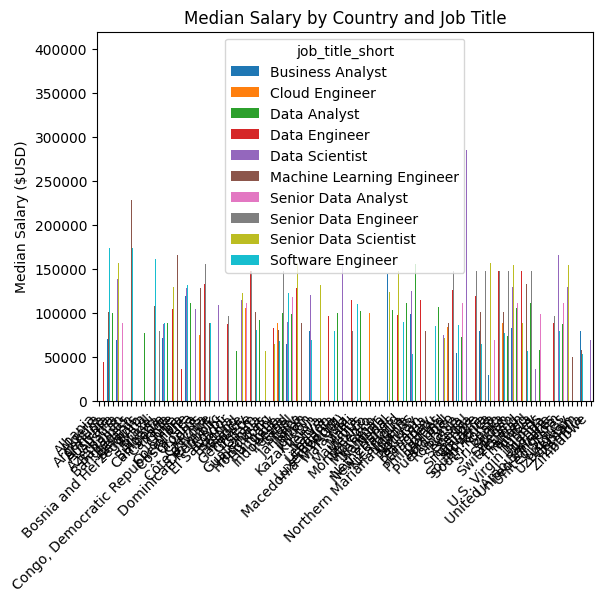

In [ ]:
df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()